In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
from simworlds.pole_world import PoleWorld
from config import Config
from rl.actor import Actor
from rl.critic import Critic
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
a = Actor(alpha=0.02, gamma=0.85, lambda_lr=0.9, epsilon=0.8)
c = Critic(isTableNotNeural=True, alpha=0.02, gamma=0.9, lambda_lr=0.9)

In [110]:
episodes = range(200)
steps = range(100)
scores = []
solutions = []
for episode in episodes:
    
    world = PoleWorld()
    state_0 = world.get_state()
    
    c.reset_episode(state_0)
    a.reset_episode()

    state = state_0
    legal_actions = world.get_legal_actions()
    action = a.select_action(state, legal_actions)

    flag = False
    while not flag:

        new_state, reward = world.do_action(action)  # Step 1

        legal_actions = world.get_legal_actions()
        
        if new_state.is_final_state:
            flag = True
            scores.append(world.t)
            solutions.append((world.pole_positions, world.cart_positions))
        else:        
            new_action = a.select_action(new_state, legal_actions)  # Step 2

        a.update_eligibility(state, action)  # Step 3

        td = c.calculate_td(state, new_state, reward)  # step 4,5
        # step 6
        c.update(td)
        a.update(td)

        # Step 7
        action = new_action
        state = new_state
        


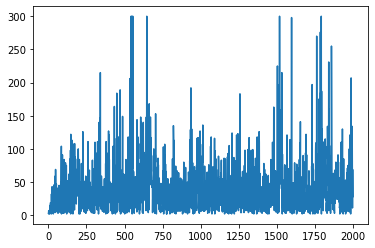

In [115]:
y = np.array(scores)
sns.lineplot(data=y)
plt.show()

In [116]:
np.argmax(y)

543

## Pole position - Cart position

<AxesSubplot:>

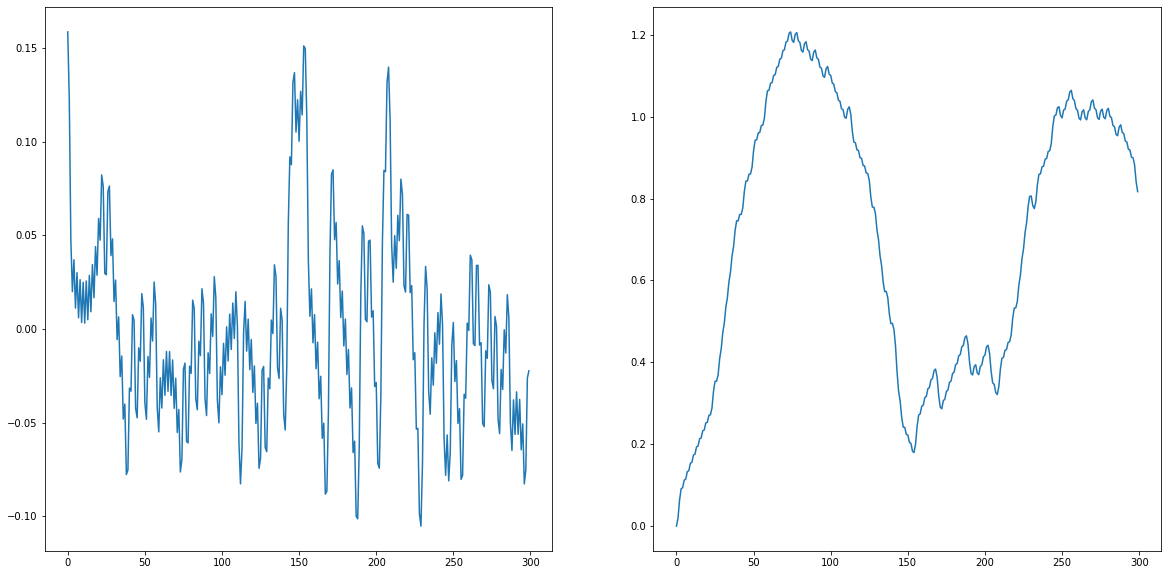

In [117]:
run_no = np.argmax(y)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.lineplot(data=solutions[run_no][0])
plt.subplot(1,2,2)
sns.lineplot(data=solutions[run_no][1])